In [1]:
import numpy as np
import yaml
import time
import pandas as pd
from utils.data_preprocessor import DataPreprocessor

with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

start_time = time.time()

interval: str = "1min"

training_file_path: str = f"../data/indicators ({interval})/TSLA_indicators.csv"
validation_file_path: str = f"../data/indicators ({interval})/AAPL_indicators.csv"
testing_file_path: str = f"../data/indicators ({interval})/MSFT_indicators.csv"

training_df = pd.read_csv(training_file_path)
validation_df = pd.read_csv(validation_file_path)
testing_df = pd.read_csv(testing_file_path)

test_processor = DataPreprocessor(training_df, validation_df, testing_df)

X_test = test_processor.X_testing_scaled
y_test = test_processor.testing_target_data_batched_target

# y_test = np.ones_like(y_test)

print("Testing Dataset shape:", testing_df.shape)
print("Testing Dataset as time series batches:",X_test.shape, y_test.shape)

end_time = time.time()
loading_datasets_time = end_time - start_time

print(f"Loading datasets: {loading_datasets_time:.2f} seconds")


Testing Dataset shape: (5000, 13)
Testing Dataset as time series batches: (4930, 10, 30) (4930,)
Loading datasets: 25.78 seconds


In [2]:
from sklearn.metrics import classification_report
from keras.models import load_model
from utils.model_evaluator import ModelEvaluator

model_path: str = "../models/saved models/trained_StockTrendLSTM_model.keras"
model = load_model(model_path)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

classification_report_output = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_report_output)

model_evaluator = ModelEvaluator(test_loss, y_test, y_pred)
metrics_df = model_evaluator.evaluation_metrics
metrics_df

155/155 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      2190
           1       1.00      0.92      0.96      2740

    accuracy                           0.96      4930
   macro avg       0.96      0.96      0.96      4930
weighted avg       0.96      0.96      0.96      4930



,Metric,Score
0,Loss,0.255262
1,Accuracy,0.957201
2,Precision,1.000000
3,Recall,0.922993
4,F1Score,0.959954
5,ROC AUC,0.961496


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten(), 'Predicted_Prob': y_pred_prob.flatten()})
results_df

,Actual,Predicted,Predicted_Prob
0,1,1,0.688753
1,1,1,0.665899
2,1,1,0.658183
3,1,1,0.634541
4,1,1,0.632980
5,1,1,0.640561
6,1,1,0.644746
7,1,1,0.650117
8,1,1,0.623433
9,1,1,0.598999


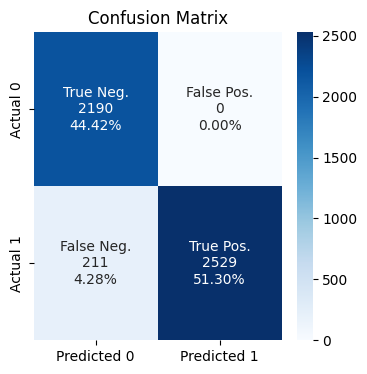

In [4]:
from utils.visualizing_service import plot_confusion_matrix
plot_confusion_matrix(y_test, y_pred)

In [5]:
from utils.visualizing_service import plot_correlation_heatmap
# plot_correlation_heatmap(test_processor.target_data)
